## import libares for the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## load the dataset

In [3]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Basic Understanding of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.shape

(1470, 35)

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## PROBLEM SATEMENTS:To analyze key factors affecting employee attrition and build a predictive model to help organizations reduce workforce turnover.

### data cleaning
- missing values 
- duplicates values
- outliers

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
df.isnull().sum()/len(df)*100

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [13]:
df.duplicated().sum()/len(df)*100

np.float64(0.0)

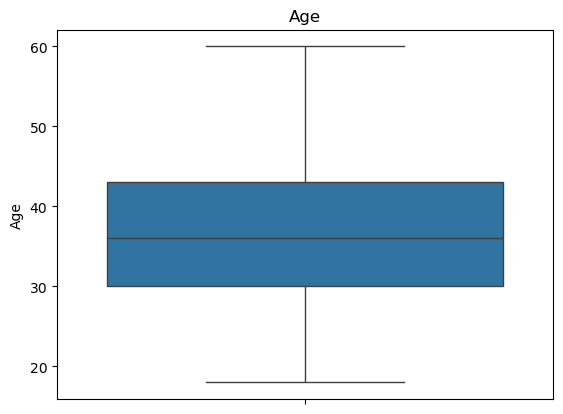

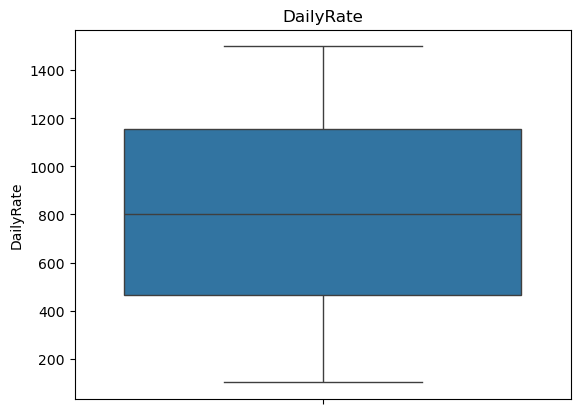

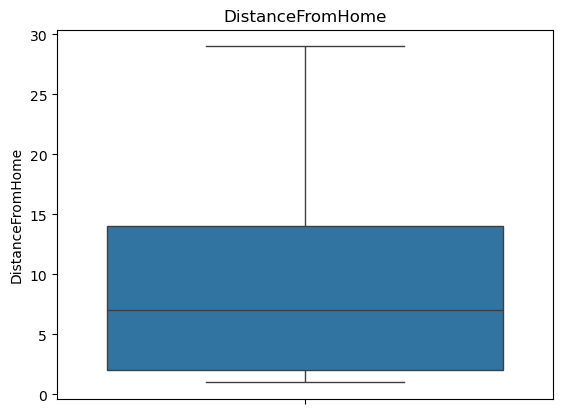

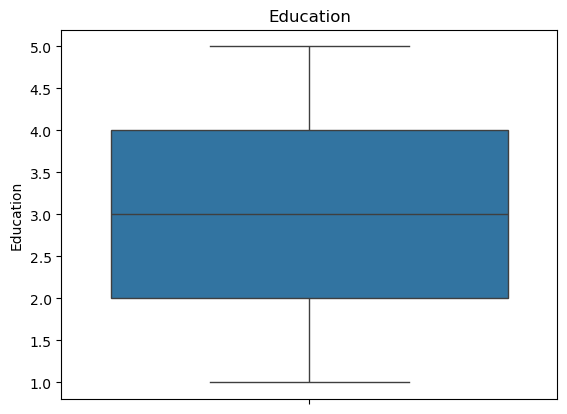

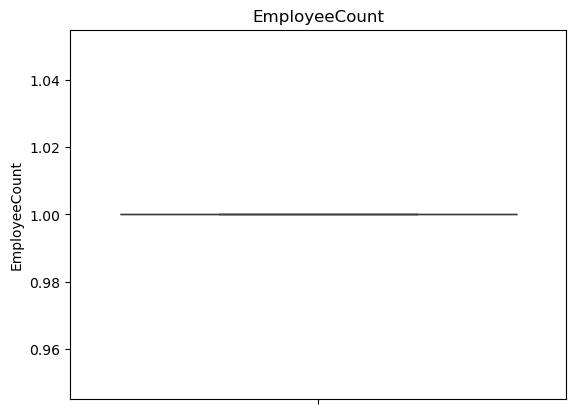

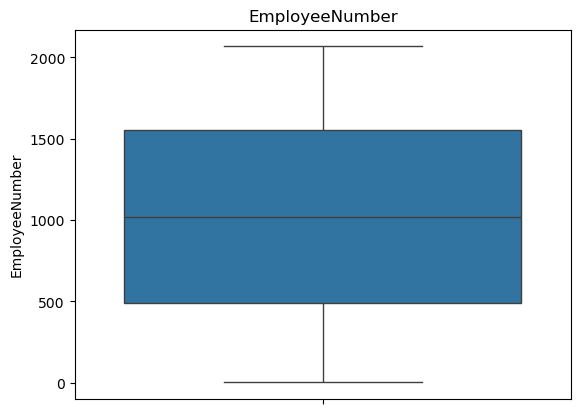

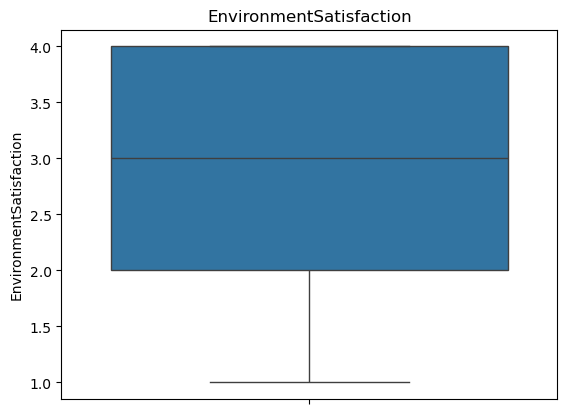

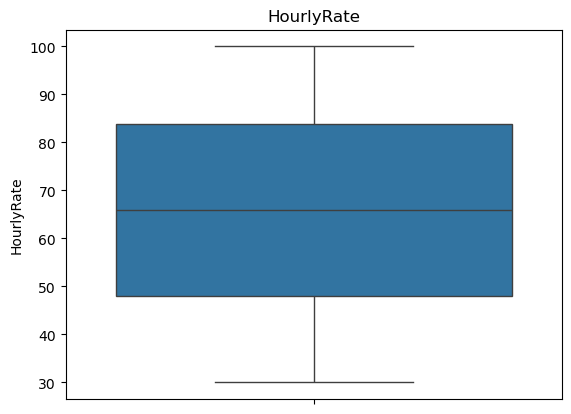

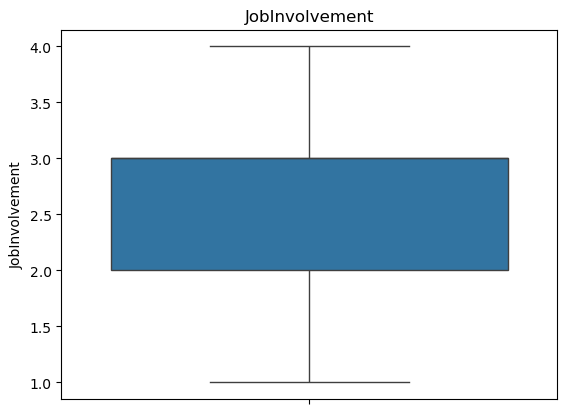

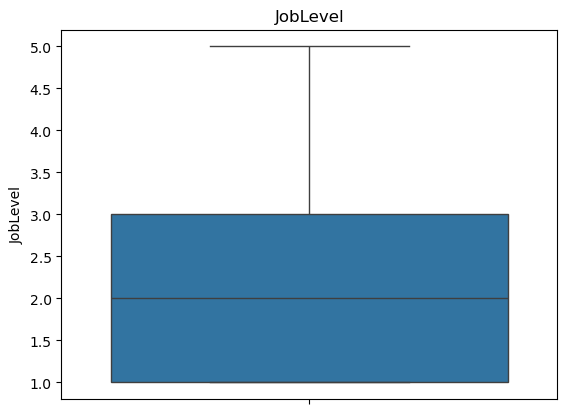

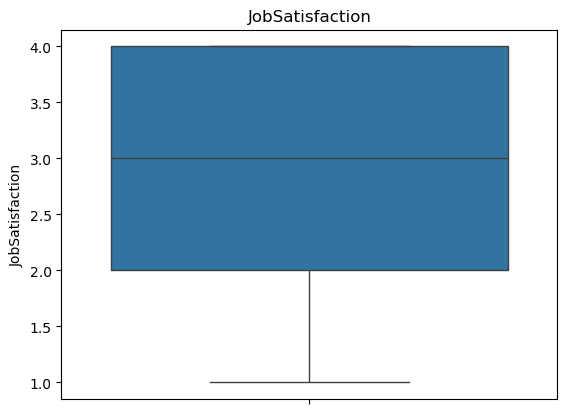

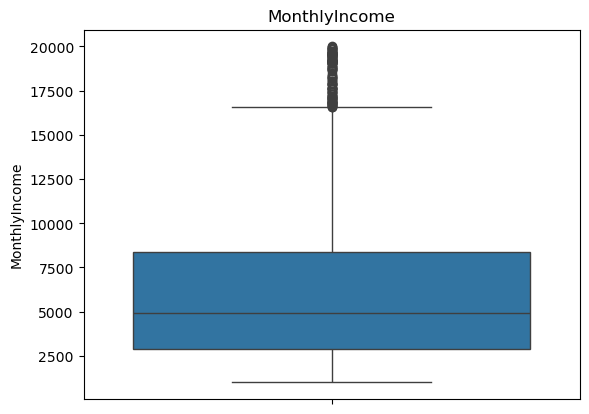

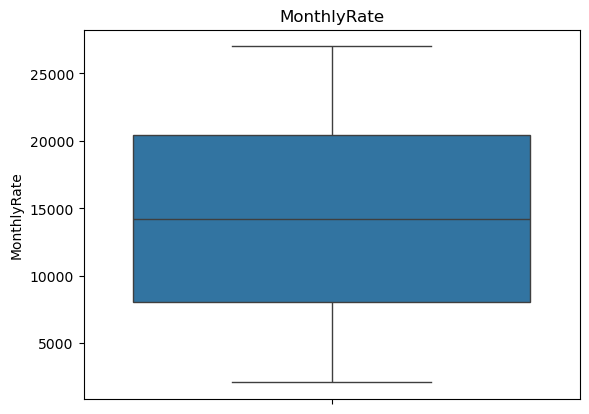

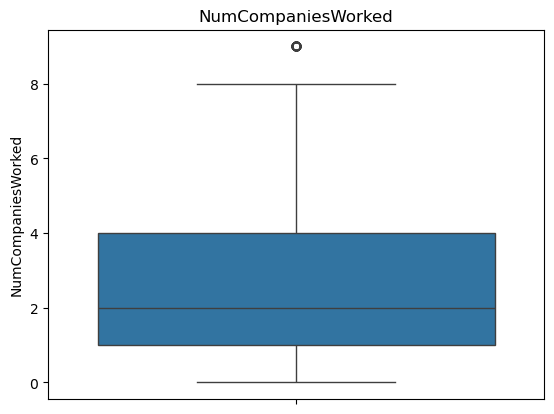

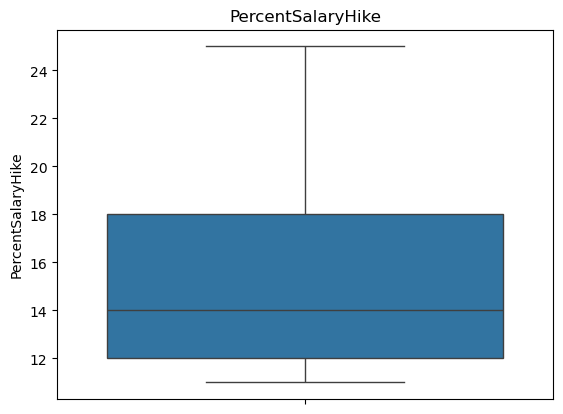

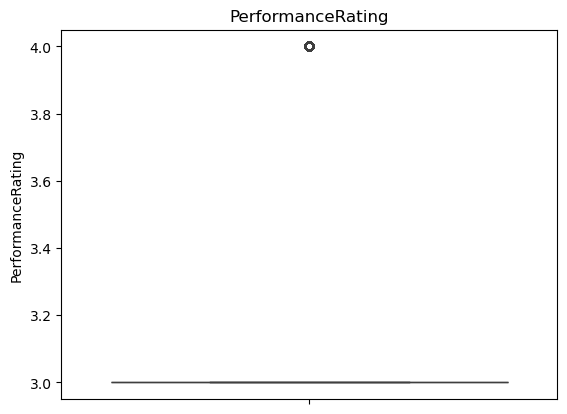

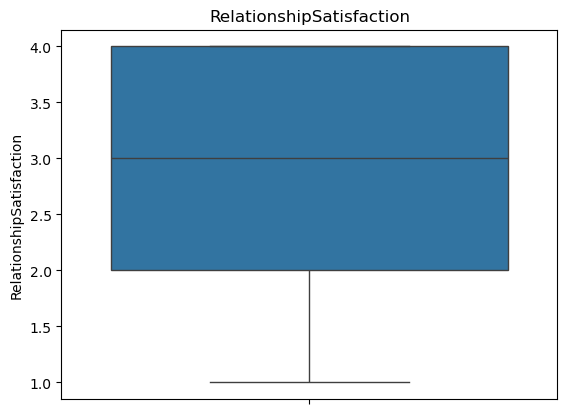

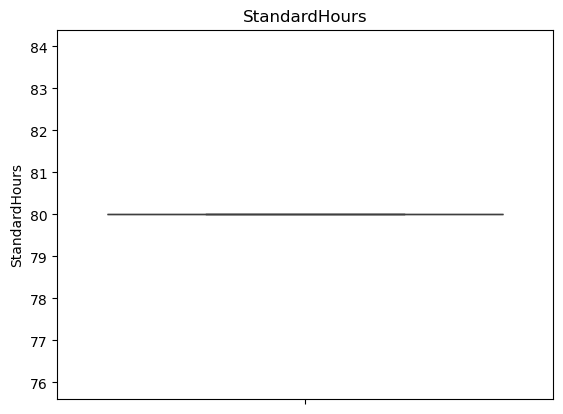

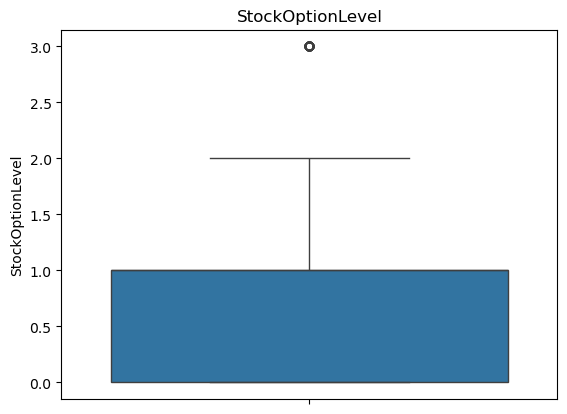

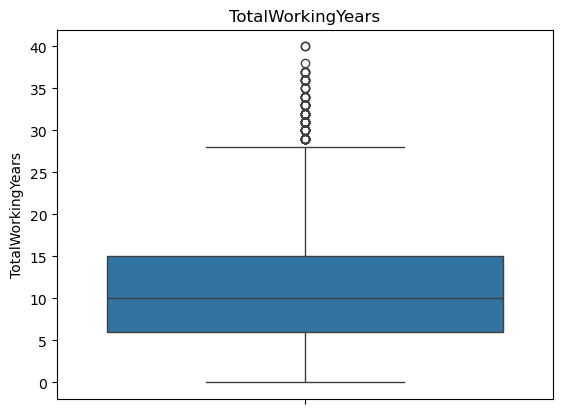

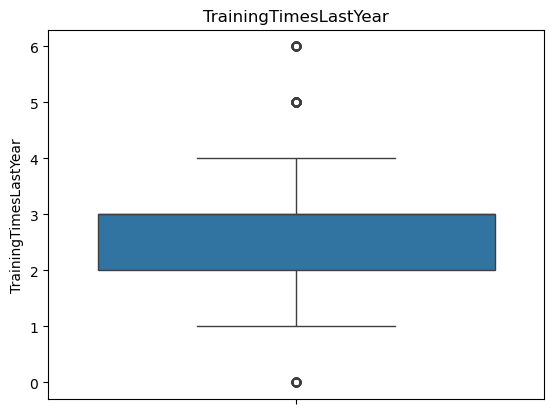

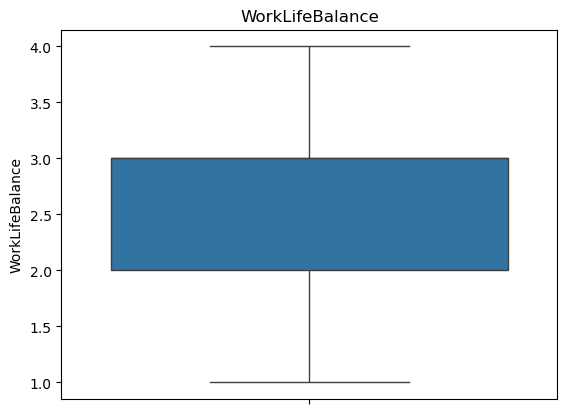

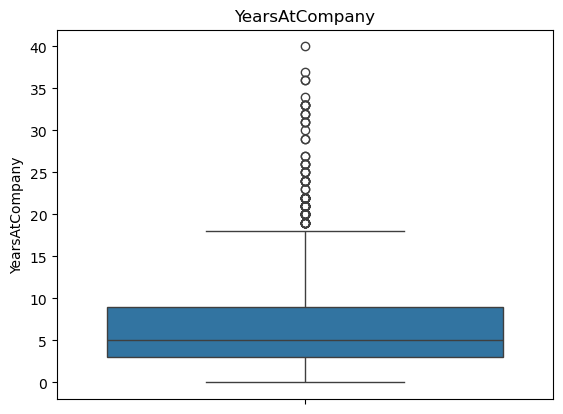

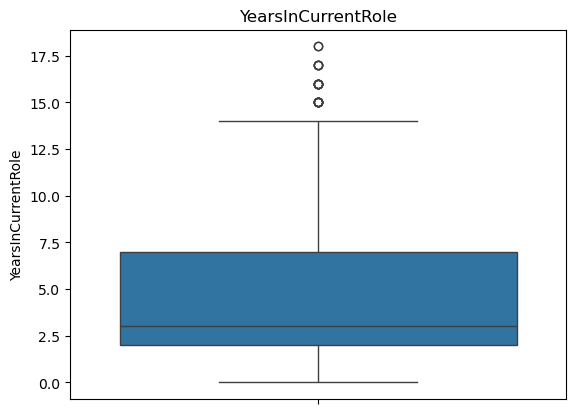

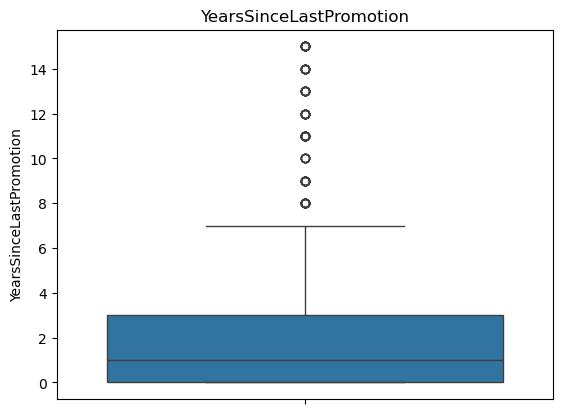

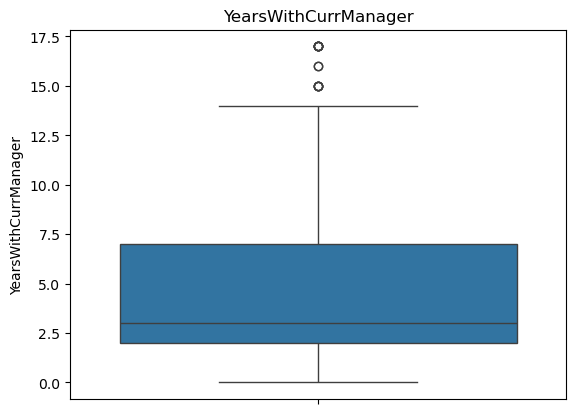

In [15]:
df_num = df.select_dtypes(include=np.number)
for i in df_num:
  sns.boxplot(df_num[i])
  plt.title(i)
  plt.show()

## EDA

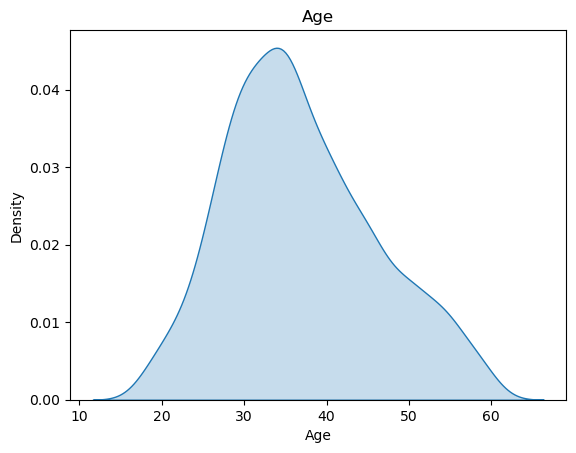

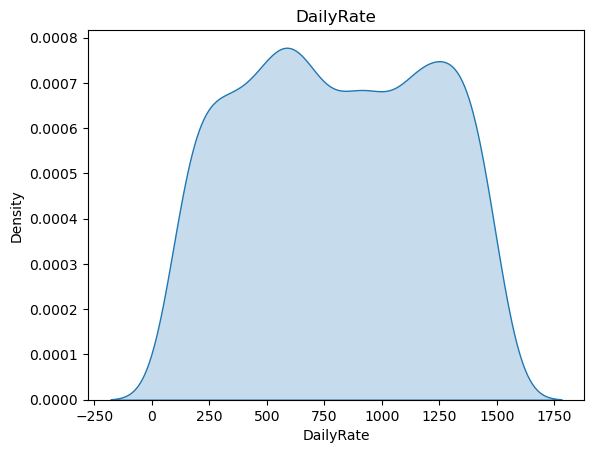

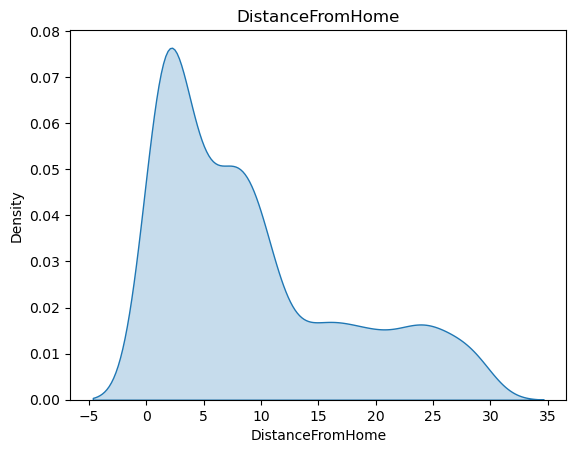

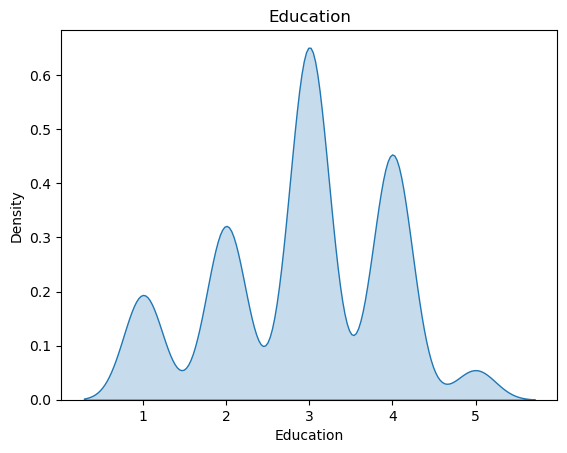

C:\Users\ammul\AppData\Local\Temp\ipykernel_7712\2454407055.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_num[i],fill = True)


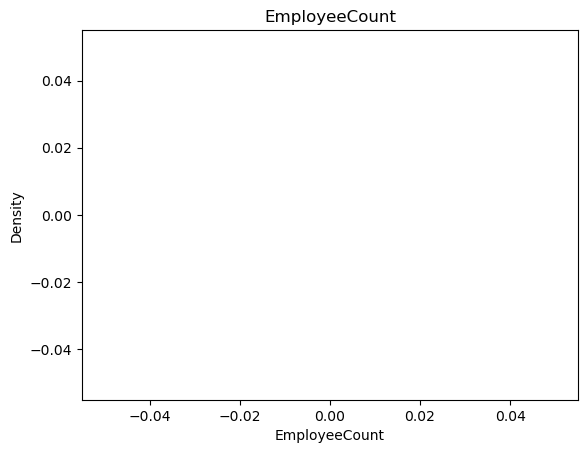

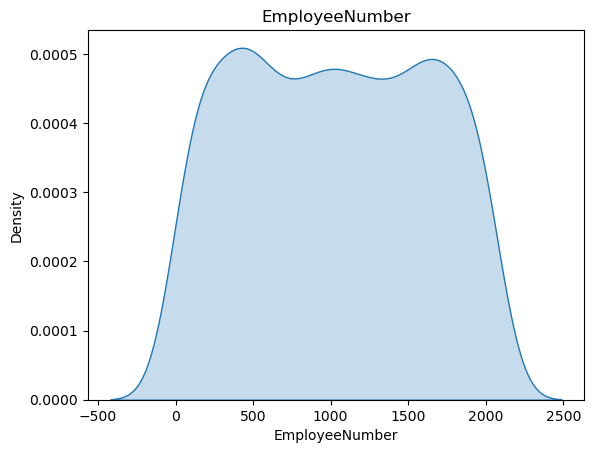

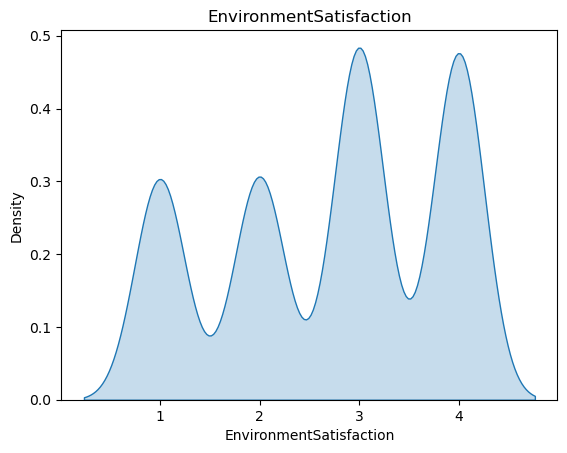

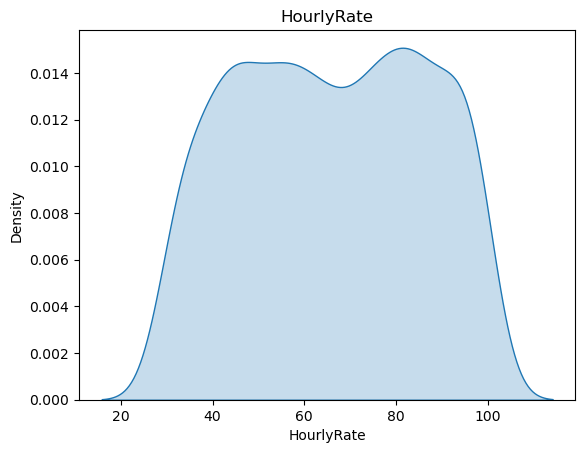

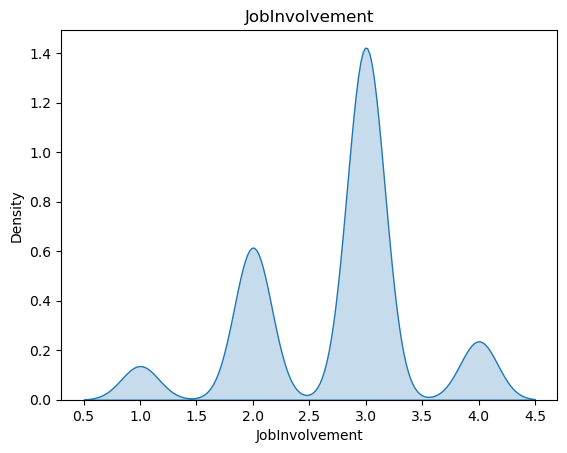

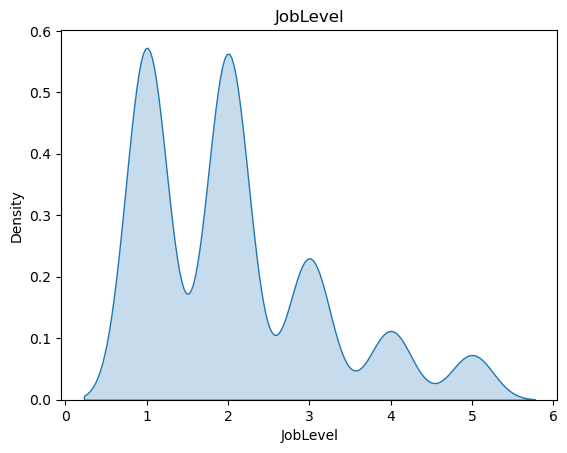

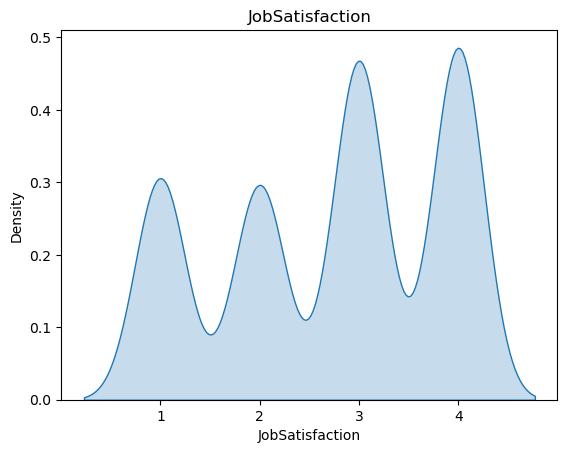

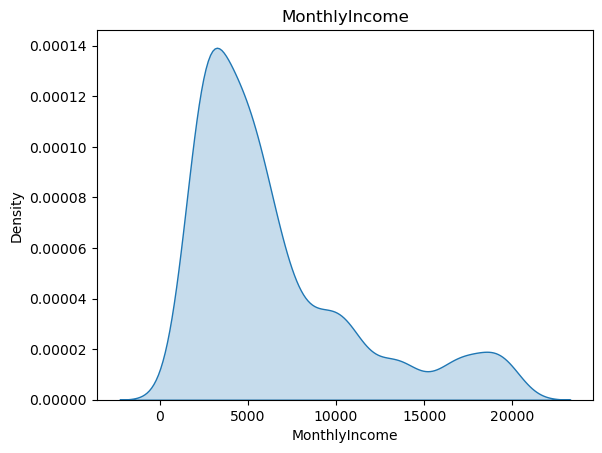

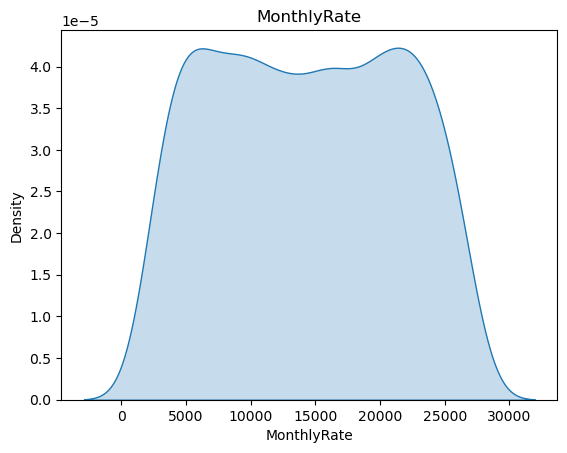

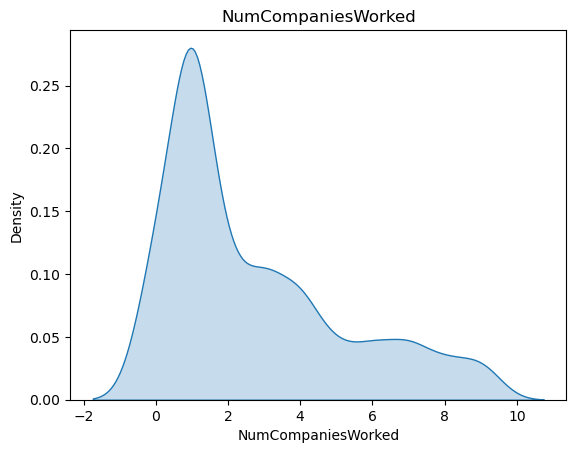

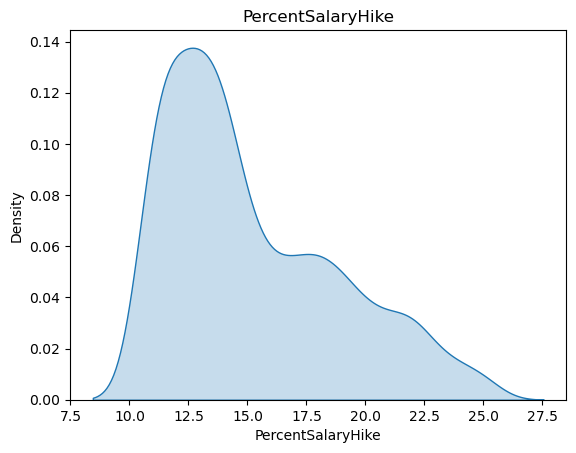

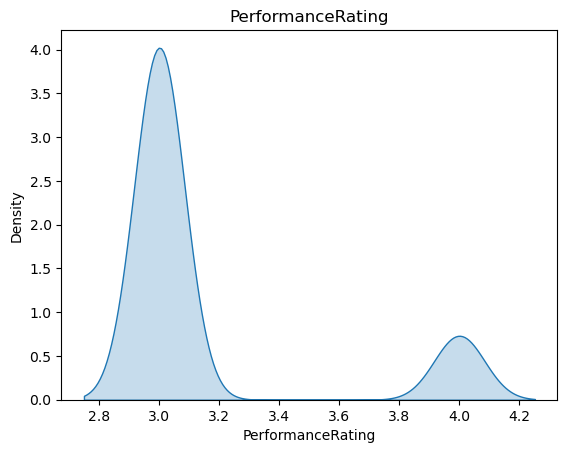

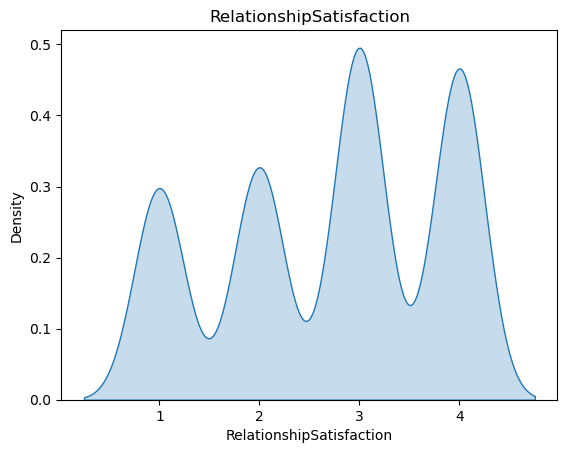

C:\Users\ammul\AppData\Local\Temp\ipykernel_7712\2454407055.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_num[i],fill = True)


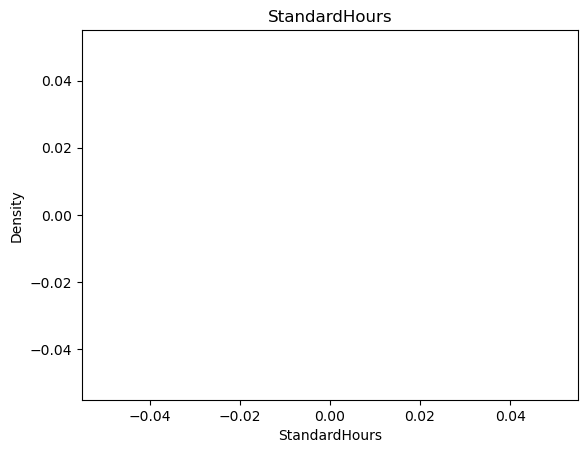

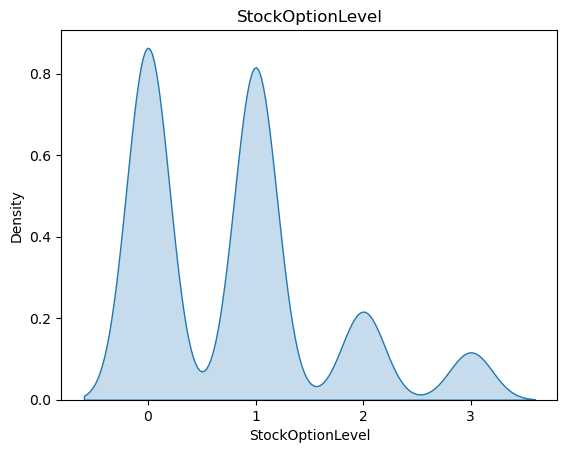

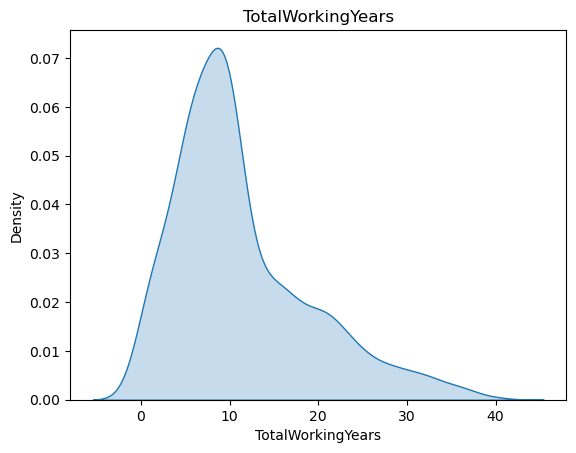

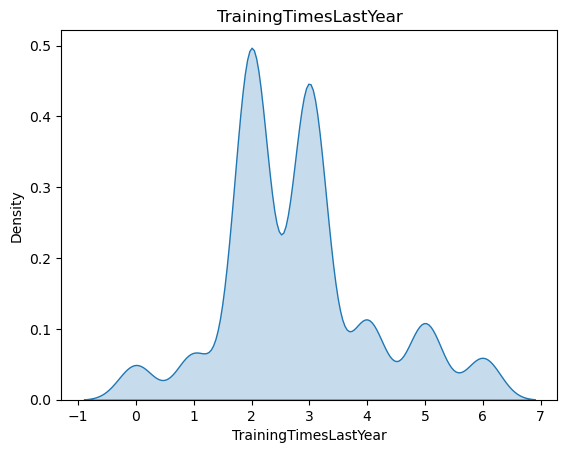

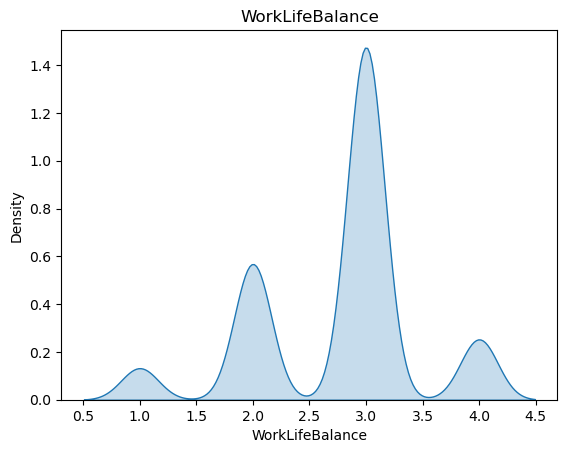

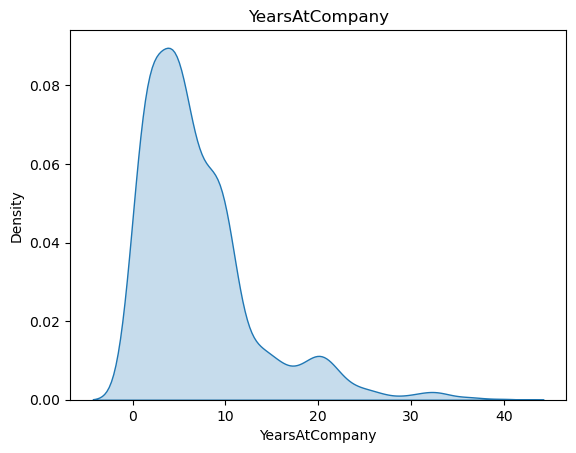

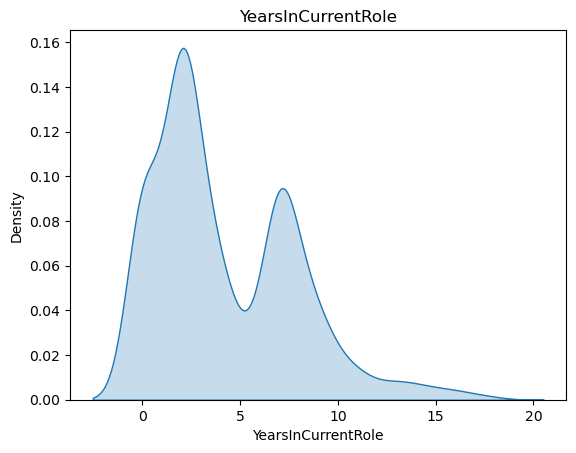

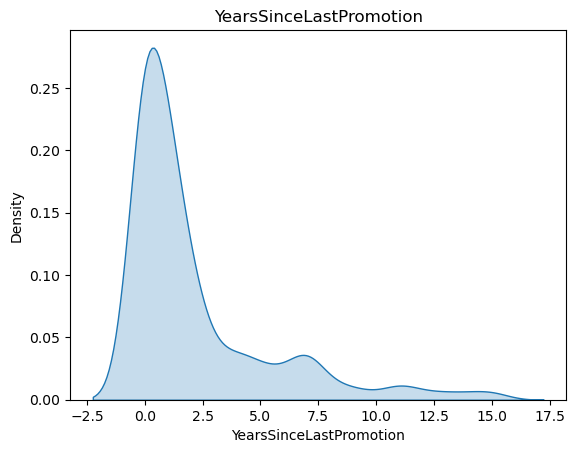

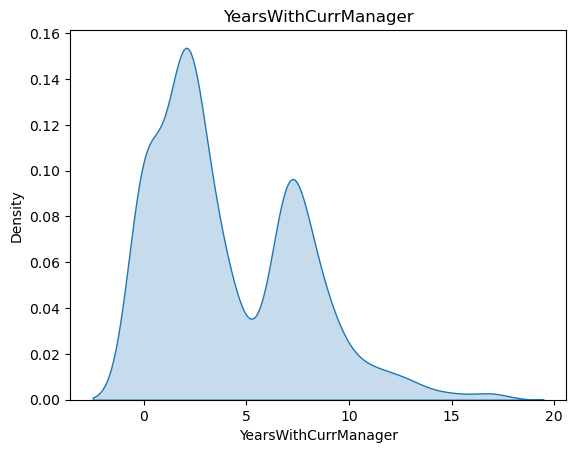

In [17]:
for i in df_num:
  sns.kdeplot(df_num[i],fill = True)
  plt.title(i)
  plt.show()

In [18]:
for i in df:
  print(i, df[i].nunique())

Age 43
Attrition 2
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1470
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


## Feature Scaling 

In [24]:
X = df.drop(columns=['Attrition'])   # predictors  
y = df['Attrition']                  # target

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(x_train.shape, x_test.shape)


(1176, 34) (294, 34)


In [29]:
num_cols = x_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = x_train.select_dtypes(include=["object"]).columns

In [19]:
# Separate numerical and categorical columns
num_cols = ['Age','MonthlyIncome']
cat_cols = ['BusinessTravel','Department','EducationField','Gender',
            'JobRole','MaritalStatus','OverTime','WorkLifeBalance']

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

transformer = ColumnTransformer(
    transformers = [
        ("cat", OrdinalEncoder(), cat_cols),     # For categorical columns
        ("num", StandardScaler(), num_cols)      # For numerical columns
    ],
    remainder="drop"
)


# Fit and transform training data
x_train_trans = transformer.fit_transform(x_train)

# Only transform test data
x_test_trans = transformer.transform(x_test)


In [27]:
x_train_trans = transformer.fit_transform(x_train)
x_test_trans = transformer.transform(x_test)

print(x_train_trans.shape)


(1176, 10)


In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
print("Numeric:", num_cols)
print("Categorical:", cat_cols)


Numeric: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Categorical: Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

In [33]:
x_train_trans = preprocessor.fit_transform(x_train)
x_test_trans = preprocessor.transform(x_test)


In [34]:
import numpy as np

cat_feature_names = preprocessor.named_transformers_["cat"] \
    .get_feature_names_out(cat_cols)

new_columns = list(num_cols) + list(cat_feature_names)


In [36]:
x_train_trans = pd.DataFrame(
    x_train_trans,
    columns=new_columns
)

x_test_trans = pd.DataFrame(
    x_test_trans,
    columns=new_columns
)


In [37]:
print(type(x_train_trans))
print(x_train_trans.shape)


<class 'pandas.core.frame.DataFrame'>
(1176, 55)


In [38]:
print(x_train_trans.shape)


(1176, 55)


In [39]:
x_test.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1041,28,Travel_Rarely,866,Sales,5,3,Medical,1,1469,4,...,4,80,0,6,4,3,5,4,1,3
184,53,Travel_Rarely,1084,Research & Development,13,2,Medical,1,250,4,...,3,80,2,5,3,3,4,2,1,3
1222,24,Travel_Rarely,240,Human Resources,22,1,Human Resources,1,1714,4,...,3,80,1,1,2,3,1,0,0,0
67,45,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,2,...,3,80,1,25,2,3,1,0,0,0
220,36,Travel_Rarely,1396,Research & Development,5,2,Life Sciences,1,304,4,...,4,80,0,16,3,4,13,11,3,7


In [40]:
x_train_trans.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,-1.388559,-1.108139,1.440396,-0.863356,0.0,0.860666,0.279706,-0.472832,-1.012340,-0.932274,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,-2.040738,-1.263481,-0.522699,-0.863356,0.0,-0.026811,-0.639104,0.309374,0.389912,-0.932274,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,-0.845077,1.103647,1.317703,-0.863356,0.0,-1.118456,1.198515,-1.059487,0.389912,-0.025447,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.241886,-0.758001,0.336155,0.099933,0.0,1.030258,1.198515,-0.032841,0.389912,-0.025447,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,-0.627685,-1.204303,1.317703,0.099933,0.0,1.404019,-0.639104,1.091580,0.389912,-0.025447,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## model Seclection

### Hyperparameter Tuning using RandomizedSearchCV

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [43]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,              # tries 20 random combinations
    cv=5,                   # 5-fold cross validation
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train_trans, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='accuracy')

In [50]:
print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best CV Accuracy: 0.9188070880526122


In [54]:
best_model = random_search.best_estimator_


In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = best_model.predict(x_test_trans)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.8639455782312925

Classification Report:
               precision    recall  f1-score   support

          No       0.89      0.97      0.93       255
         Yes       0.47      0.18      0.26        39

    accuracy                           0.86       294
   macro avg       0.68      0.57      0.59       294
weighted avg       0.83      0.86      0.84       294


Confusion Matrix:
 [[247   8]
 [ 32   7]]


In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_bal, y_train_bal = smote.fit_resample(x_train_trans, y_train)


In [48]:
random_search.fit(x_train_bal, y_train_bal)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='accuracy')

In [49]:
y_pred = best_model.predict(x_test_trans)


In [59]:
best_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    class_weight='balanced',
    random_state=42
)

best_model.fit(x_train_trans, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=20,
                       max_features='log2', random_state=42)

In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = best_model.predict(x_test_trans)

print("Final Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Final Test Accuracy: 0.8775510204081632
              precision    recall  f1-score   support

          No       0.88      1.00      0.93       255
         Yes       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

[[254   1]
 [ 35   4]]


In [61]:
y_pred = best_model.predict(x_test_trans)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("New Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


New Test Accuracy: 0.8775510204081632
              precision    recall  f1-score   support

          No       0.88      1.00      0.93       255
         Yes       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

[[254   1]
 [ 35   4]]


In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_bal, y_train_bal = smote.fit_resample(x_train_trans, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_bal.value_counts())


Before SMOTE: Attrition
No     978
Yes    198
Name: count, dtype: int64
After SMOTE: Attrition
No     978
Yes    978
Name: count, dtype: int64


In [90]:
# randomForestclassifier
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    random_state=42
)

best_model.fit(x_train_bal, y_train_bal)


RandomForestClassifier(max_depth=20, max_features='log2', random_state=42)

## KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)   # default basic KNN
knn.fit(x_train_trans, y_train)


KNeighborsClassifier(n_neighbors=7)

In [74]:
## predict on test data
y_pred_knn = knn.predict(x_test_trans)


In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


Test Accuracy: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.98      0.92       255
         Yes       0.20      0.03      0.05        39

    accuracy                           0.86       294
   macro avg       0.53      0.50      0.48       294
weighted avg       0.78      0.86      0.81       294


Confusion Matrix:
 [[251   4]
 [ 38   1]]


In [91]:
#DecisionTreeclassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --------- MODEL DEFINITION ---------
dt_model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=11,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    random_state=42
)

In [77]:
## train model
dt_model.fit(x_train_trans, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [78]:
## cart tuning
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tuned_parameters = [{"max_depth" : [i for i in range(1,51)]}]

clf = GridSearchCV(
    estimator = DecisionTreeClassifier(criterion="gini", random_state=42),   # CART uses Gini
    param_grid = tuned_parameters,
    scoring = "accuracy",
    cv=5,
    return_train_score = True,
    verbose = 1
)

clf.fit(x_train_trans, y_train)

print("Best Estimator:\n", clf.best_estimator_)
print("\nTrain score :", clf.score(x_train_trans, y_train))
print("Test score  :", clf.score(x_test_trans, y_test))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Estimator:
 DecisionTreeClassifier(max_depth=2, random_state=42)

Train score : 0.8579931972789115
Test score  : 0.8537414965986394


In [79]:
## best cart model
best_cart = clf.best_estimator_


In [80]:
#prediction
y_pred_cart = best_cart.predict(x_test_trans)


In [81]:
# CART Algorithm (Classification)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize CART model
cart_model = DecisionTreeClassifier(
    criterion="gini",      # CART uses Gini Index
    max_depth=None,        # control overfitting
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train the model
cart_model.fit(x_train_trans, y_train)

# Predict on test data
y_pred = cart_model.predict(x_test_trans)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("test CART Model Accuracy :", accuracy)


test CART Model Accuracy : 0.7789115646258503


In [82]:
y_pred = cart_model.predict(x_train_trans)
accuracy = accuracy_score(y_train, y_pred)
print("Train CART Model Accuracy:", accuracy)


Train CART Model Accuracy: 1.0


In [83]:
# Feature Importance
cart_model.feature_importances_

array([0.0220999 , 0.08485699, 0.051346  , 0.00539439, 0.        ,
       0.025038  , 0.02429534, 0.07123222, 0.03181625, 0.01030397,
       0.01113146, 0.09893644, 0.05892781, 0.03604685, 0.00089456,
       0.00694057, 0.02491804, 0.        , 0.00996623, 0.04689081,
       0.03534362, 0.01357982, 0.0281701 , 0.0303149 , 0.03417532,
       0.00678152, 0.        , 0.01684408, 0.01624917, 0.00506083,
       0.00455475, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00786193, 0.00455475, 0.012146  ,
       0.00259973, 0.0009393 , 0.00098259, 0.        , 0.01156268,
       0.        , 0.02019884, 0.00139153, 0.0120737 , 0.00585611,
       0.        , 0.02900498, 0.        , 0.07871793, 0.        ])

In [89]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = dt_model.predict(x_test_trans)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8095238095238095

Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.91      0.89       255
         Yes       0.19      0.13      0.15        39

    accuracy                           0.81       294
   macro avg       0.53      0.52      0.52       294
weighted avg       0.78      0.81      0.79       294


Confusion Matrix:
 [[233  22]
 [ 34   5]]


In [88]:
cart_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=8,          # limit depth
    min_samples_split=8,
    min_samples_leaf=4,
    random_state=42
)

cart_model.fit(x_train_trans, y_train)

y_pred = cart_model.predict(x_test_trans)

from sklearn.metrics import accuracy_score, classification_report

print("New Train Accuracy:", cart_model.score(x_train_trans, y_train))
print("New Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


New Train Accuracy: 0.9311224489795918
New Test Accuracy: 0.7993197278911565
              precision    recall  f1-score   support

          No       0.88      0.89      0.89       255
         Yes       0.21      0.18      0.19        39

    accuracy                           0.80       294
   macro avg       0.54      0.54      0.54       294
weighted avg       0.79      0.80      0.79       294



In [87]:
cart_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=8,
    min_samples_split=8,
    min_samples_leaf=4,
    class_weight="balanced",
    random_state=42
)


## Random Forest Regression

In [92]:
X = df.drop(columns=['MonthlyIncome','Attrition'])   # predictors
y = df['MonthlyIncome']                             # numeric target


In [96]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [97]:
num_cols = x_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = x_train.select_dtypes(include=['object']).columns.tolist()

print("Numerical:", num_cols)
print("Categorical:", cat_cols)

Numerical: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [95]:
print(X.columns)


Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

transformer = ColumnTransformer(
    transformers = [
        ("cat", OrdinalEncoder(), cat_cols),
        ("num", StandardScaler(), num_cols)
    ]
)


In [99]:
x_train_trans = transformer.fit_transform(x_train)
x_test_trans = transformer.transform(x_test)

print(x_train_trans.shape)


(1176, 33)


In [100]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    random_state=42
)

rf_reg.fit(x_train_trans, y_train)


RandomForestRegressor(max_depth=15, random_state=42)

In [101]:
## prediction
y_pred = rf_reg.predict(x_test_trans)


In [102]:
##evalute
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.9314742574387439
MAE: 903.3495125337354
RMSE: 1223.7884245063776


In [103]:
import pandas as pd

feature_names = list(transformer.get_feature_names_out())

imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf_reg.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(imp_df.head(10))


                    Feature  Importance
17            num__JobLevel    0.928674
26   num__TotalWorkingYears    0.012278
4              cat__JobRole    0.010758
9            num__DailyRate    0.004892
19         num__MonthlyRate    0.004459
15          num__HourlyRate    0.003903
13      num__EmployeeNumber    0.003755
10    num__DistanceFromHome    0.003252
20  num__NumCompaniesWorked    0.002893
8                  num__Age    0.002553


In [105]:
import pandas as pd

# get feature names from your existing ColumnTransformer
feature_names = list(transformer.get_feature_names_out())

# build feature importance table
feature_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf_reg.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_imp_df.head(10))



                    Feature  Importance
17            num__JobLevel    0.928674
26   num__TotalWorkingYears    0.012278
4              cat__JobRole    0.010758
9            num__DailyRate    0.004892
19         num__MonthlyRate    0.004459
15          num__HourlyRate    0.003903
13      num__EmployeeNumber    0.003755
10    num__DistanceFromHome    0.003252
20  num__NumCompaniesWorked    0.002893
8                  num__Age    0.002553


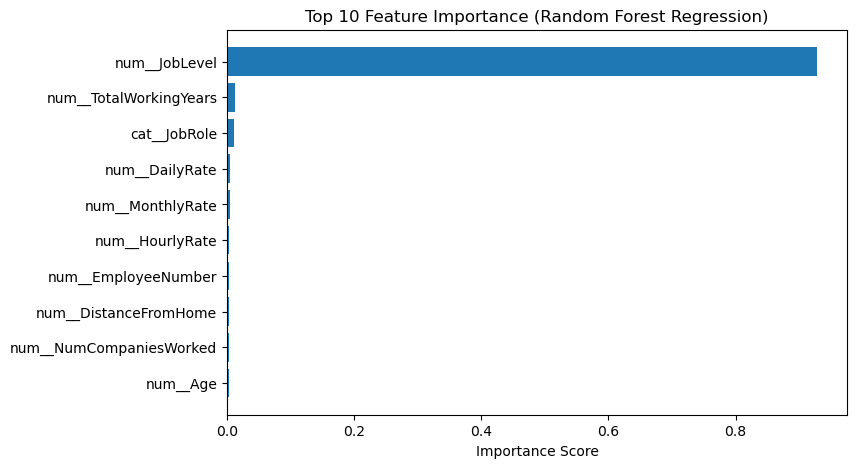

In [106]:
import matplotlib.pyplot as plt

top10 = feature_imp_df.head(10)

plt.figure(figsize=(8,5))
plt.barh(top10["Feature"], top10["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importance (Random Forest Regression)")
plt.xlabel("Importance Score")
plt.show()
